## Customer Segmentation using KMeans Clustering Algorithm

In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Mall_Customers.csv")
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
# Checking for the missing values
data.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
# Checking for duplicated values
data.duplicated().sum()

0

In [8]:
# Renaming the gender column.
data.rename(columns={'Genre': 'Gender'}, inplace=True)

In [9]:
data["Gender"].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [10]:
# Percentages of men and women in the given data
num_fem = 112 / len(data)
num_male = 88 / len(data)
num_fem, num_male

(0.56, 0.44)

In [11]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
data["Gender"] = enc.fit_transform(data["Gender"])

In [12]:
data.dtypes

CustomerID                int64
Gender                    int32
Age                       int64
Annual Income (k$)        int64
Spending Score (1-100)    int64
dtype: object

In [13]:
# CustomerID is irrelavant for the current problem
data.drop("CustomerID", axis=1, inplace=True)

In [14]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


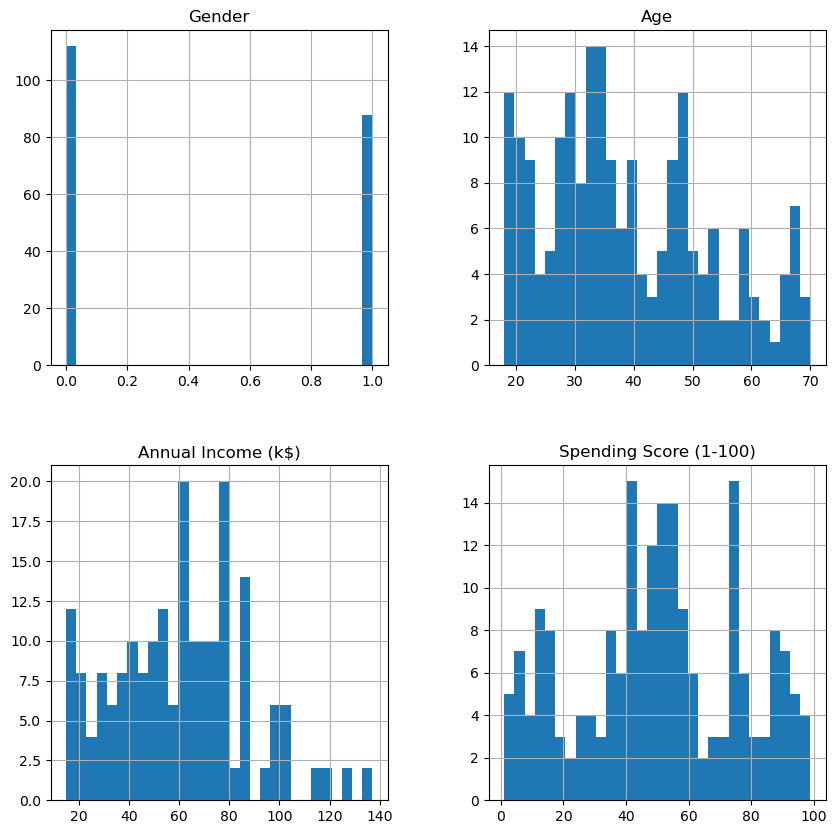

In [15]:
data.hist(bins=30, figsize=(10, 10))
plt.show()

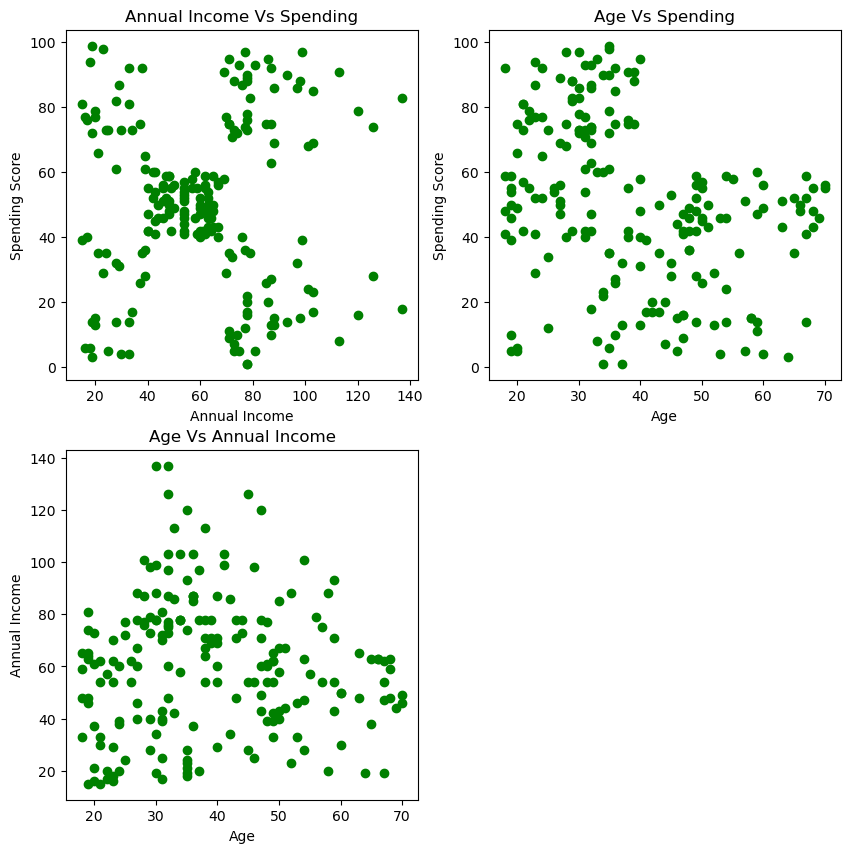

In [16]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.scatter(data["Annual Income (k$)"], data["Spending Score (1-100)"], c='green')
plt.title("Annual Income Vs Spending")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")

plt.subplot(2, 2, 2)
plt.scatter(data["Age"], data["Spending Score (1-100)"], c='green')
plt.title("Age Vs Spending")
plt.xlabel("Age")
plt.ylabel("Spending Score")

plt.subplot(2, 2, 3)
plt.scatter(data["Age"], data["Annual Income (k$)"], c='green')
plt.title("Age Vs Annual Income")
plt.xlabel("Age")
plt.ylabel("Annual Income")

plt.show()

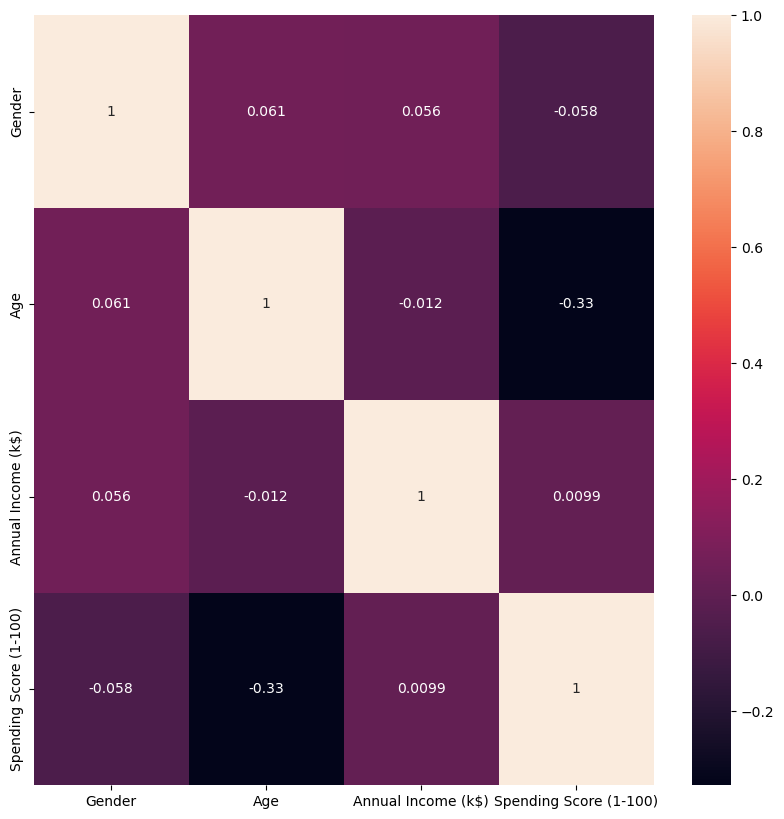

In [17]:
# Checking the correlation coefficients
cor = data.corr()
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(cor, annot=True)

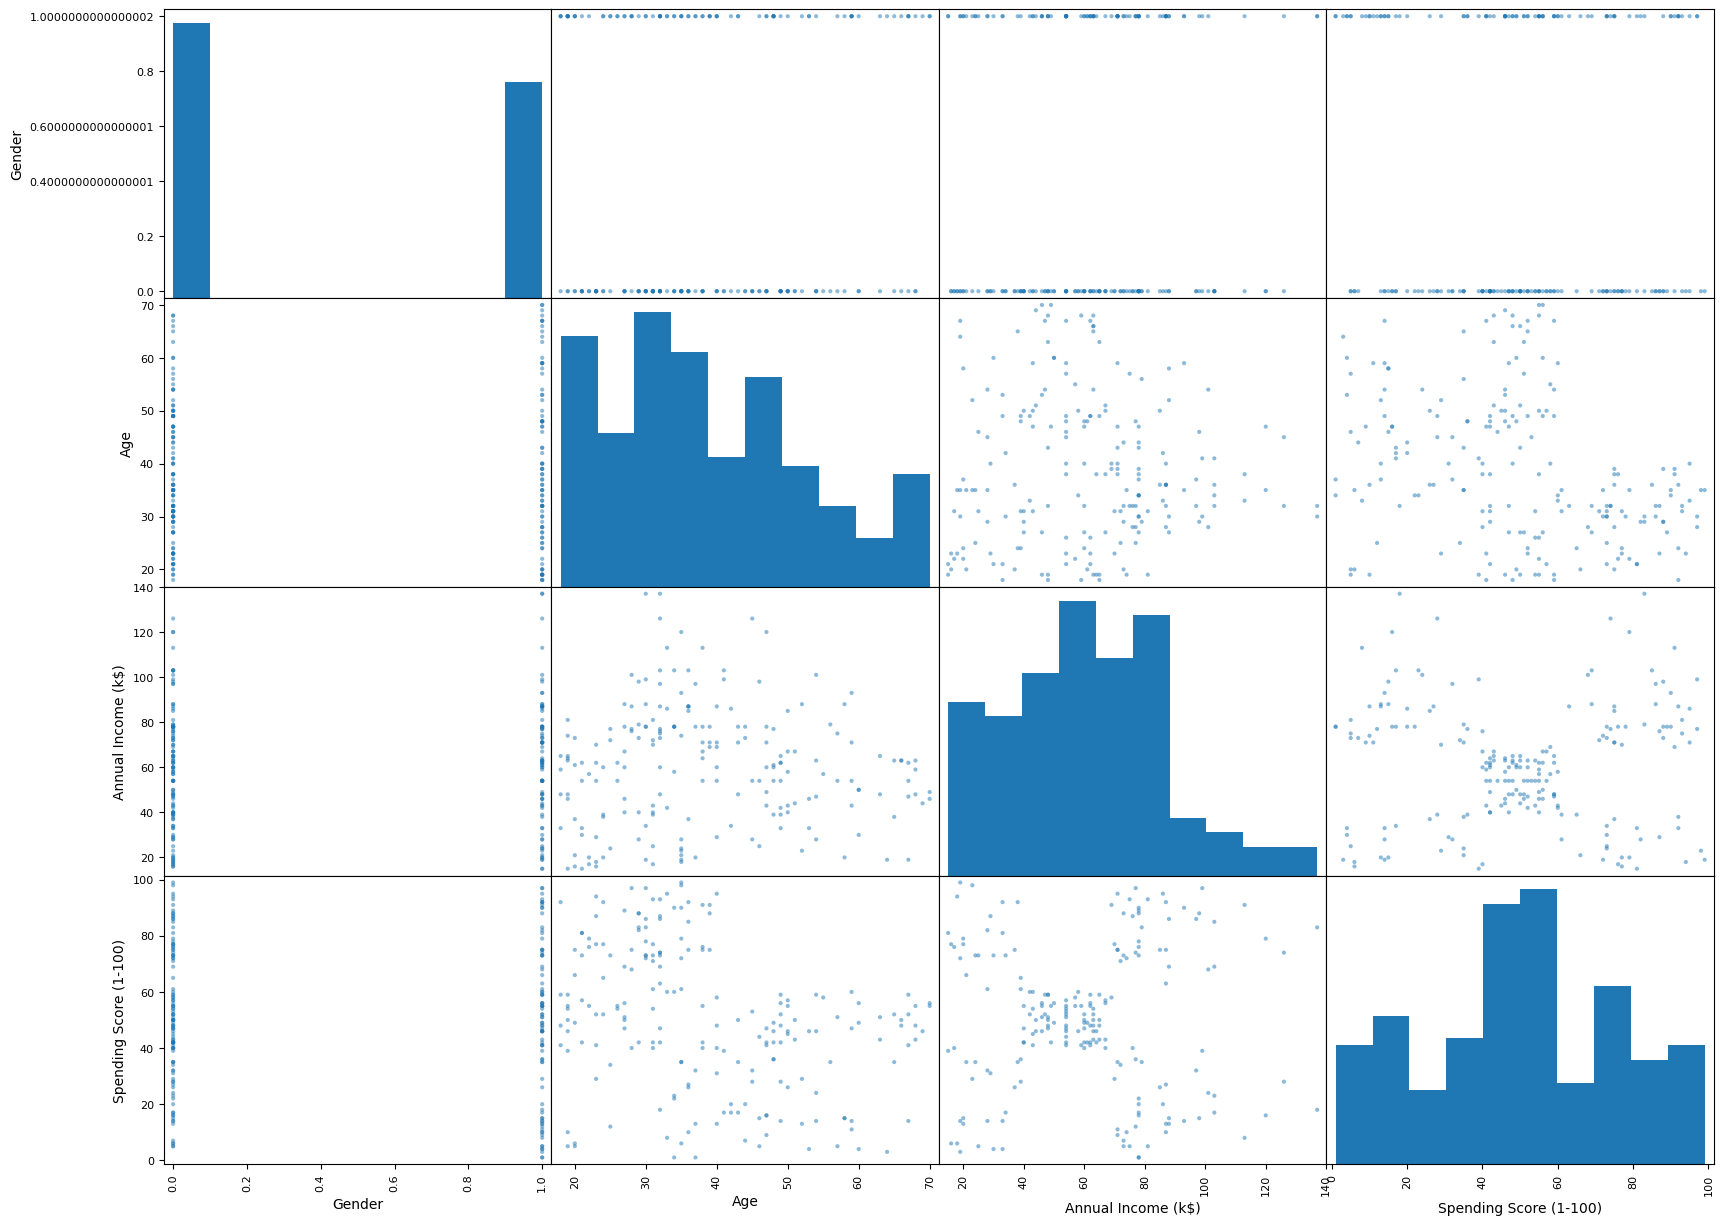

In [18]:
pd.plotting.scatter_matrix(data, figsize=(20,15))
plt.show()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


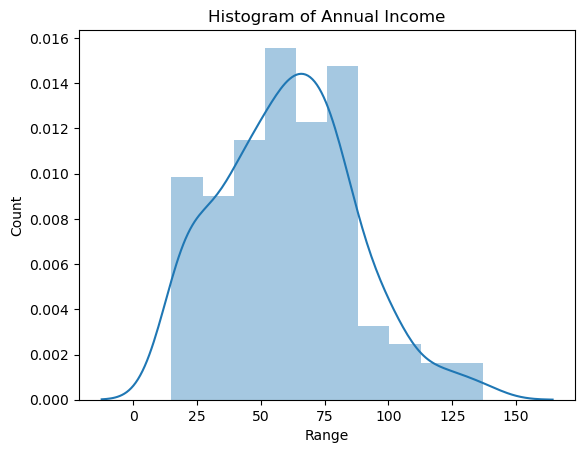

In [19]:
# We use distplot for better understanding of the distribution
plt.plot(figsize=(10, 10))
sns.distplot(data["Annual Income (k$)"])
plt.title("Histogram of Annual Income")
plt.xlabel("Range")
plt.ylabel("Count")
plt.show()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


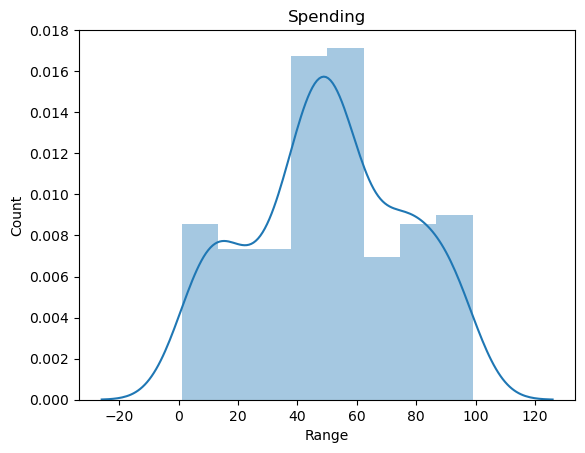

In [20]:
plt.plot(figsize=(10, 10))
sns.distplot(data["Spending Score (1-100)"])
plt.title("Spending")
plt.xlabel("Range")
plt.ylabel("Count")
plt.show()

In [21]:
data_dup = data.copy()

In [22]:
data_dup

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [23]:
# We scale the data to get it in the same range
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
data = sc.fit_transform(data)

In [24]:
data = pd.DataFrame(data, columns=[data_dup.columns])
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.008197,0.051020
3,0.0,0.096154,0.008197,0.775510
4,0.0,0.250000,0.016393,0.397959


In [25]:
data_new = data.drop("Gender", axis=1)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12568\562468867.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  data_new = data.drop("Gender", axis=1)


In [26]:
# CustomerID and Gender are irrelevant to study about the customers.
# We only check the correlation for Age, Spending score and Annual Income

from sklearn.cluster import KMeans
# We cluster the data using different number of clusters and find the optimal clusters using elbow method.

# Find the clusters based on Annual Income and Spending score
d = data_new.drop(["Age"], axis=1)
da = data_new.drop(["Annual Income (k$)"], axis=1)
dat = data_new.drop(["Spending Score (1-100)"], axis=1)


def kmeans_clust(data):
    inertia_scores = []
    for i in range(2, 11):
        km = KMeans(n_clusters=i, init="k-means++", random_state=42)
        km.fit(data)
        inertia_scores.append(km.inertia_)
    
    return inertia_scores

x = kmeans_clust(d)
y = kmeans_clust(da)
z = kmeans_clust(dat)


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\

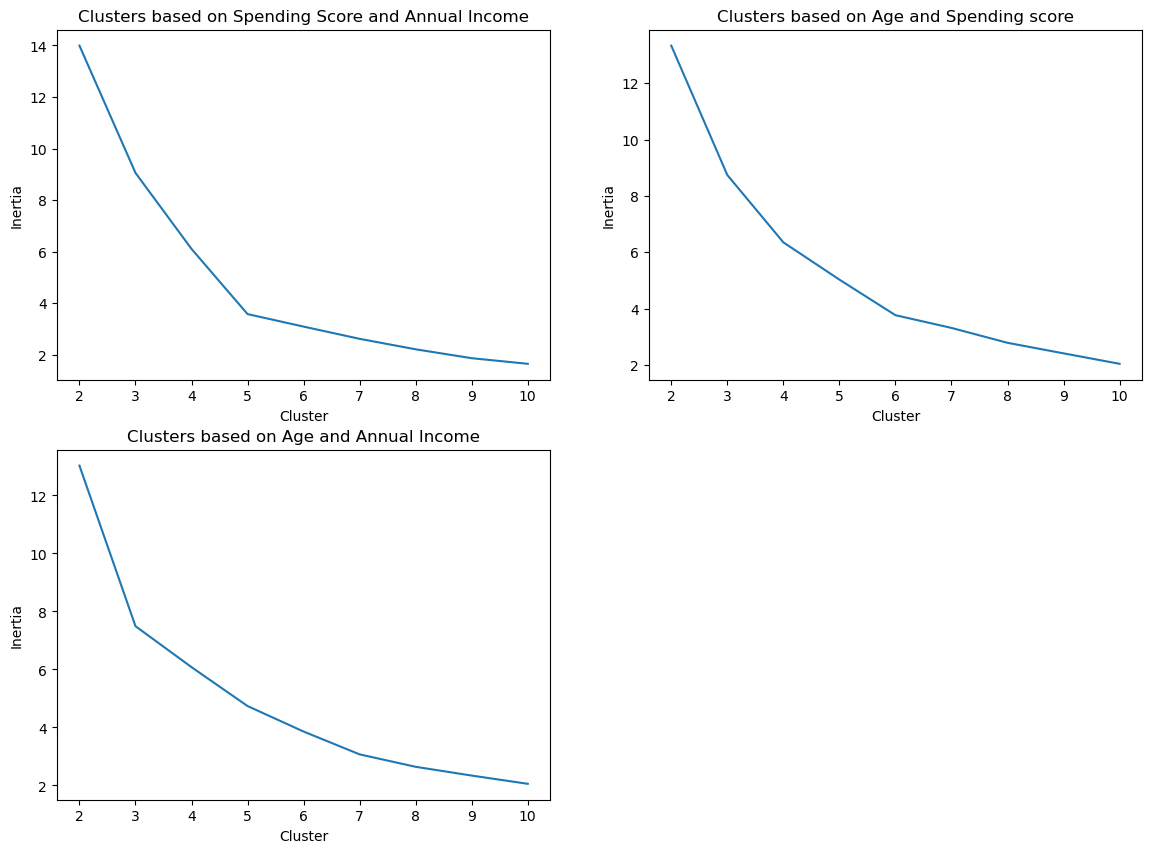

In [27]:
#plt.figure(figsize=(10, 10))
plt.rcParams['figure.figsize'] = (14, 10)

plt.subplot(2, 2, 1)
plt.plot(range(2, 11), x)
plt.title("Clusters based on Spending Score and Annual Income")
plt.xlabel("Cluster")
plt.ylabel("Inertia")

plt.subplot(2, 2, 2)
plt.plot(range(2, 11), y)
plt.title("Clusters based on Age and Spending score")
plt.xlabel("Cluster")
plt.ylabel("Inertia")

plt.subplot(2, 2, 3)
plt.plot(range(2, 11), z)
plt.title("Clusters based on Age and Annual Income")
plt.xlabel("Cluster")
plt.ylabel("Inertia")

plt.show()

In [28]:
# Optimal number of clusters based on Annual Income and Spending score = 5
# Optimal number of clusters based on Age and Spending score = 6
# Optimal number of clusters based on Annual Income and Age = 3

In [29]:
kmeans1 = KMeans(n_clusters=5, init="k-means++", random_state=42)
d["Cluster"] = kmeans1.fit_predict(d)
d.head()

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


,Annual Income (k$),Spending Score (1-100),Cluster
0,0.000000,0.387755,2
1,0.000000,0.816327,3
2,0.008197,0.051020,2
3,0.008197,0.775510,3
4,0.016393,0.397959,2


In [30]:
d_arr = np.array(d)


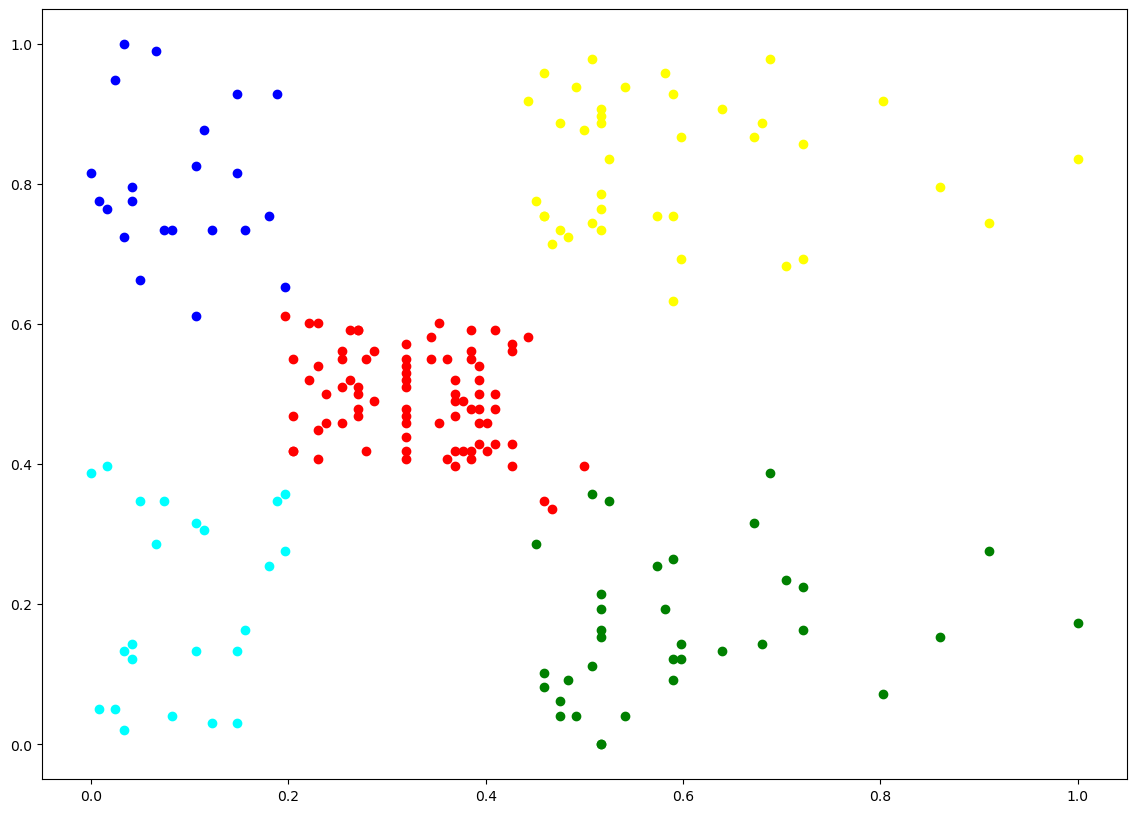

In [31]:
plt.scatter(d_arr[d_arr[:,2]==0, 0], d_arr[d_arr[:,2]==0, 1], c='red')
plt.scatter(d_arr[d_arr[:,2]==1, 0], d_arr[d_arr[:,2]==1, 1], c='green')
plt.scatter(d_arr[d_arr[:,2]==2, 0], d_arr[d_arr[:,2]==2, 1], c='cyan')
plt.scatter(d_arr[d_arr[:,2]==3, 0], d_arr[d_arr[:,2]==3, 1], c='blue')
plt.scatter(d_arr[d_arr[:,2]==4, 0], d_arr[d_arr[:,2]==4, 1], c='yellow')
plt.show()
    

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


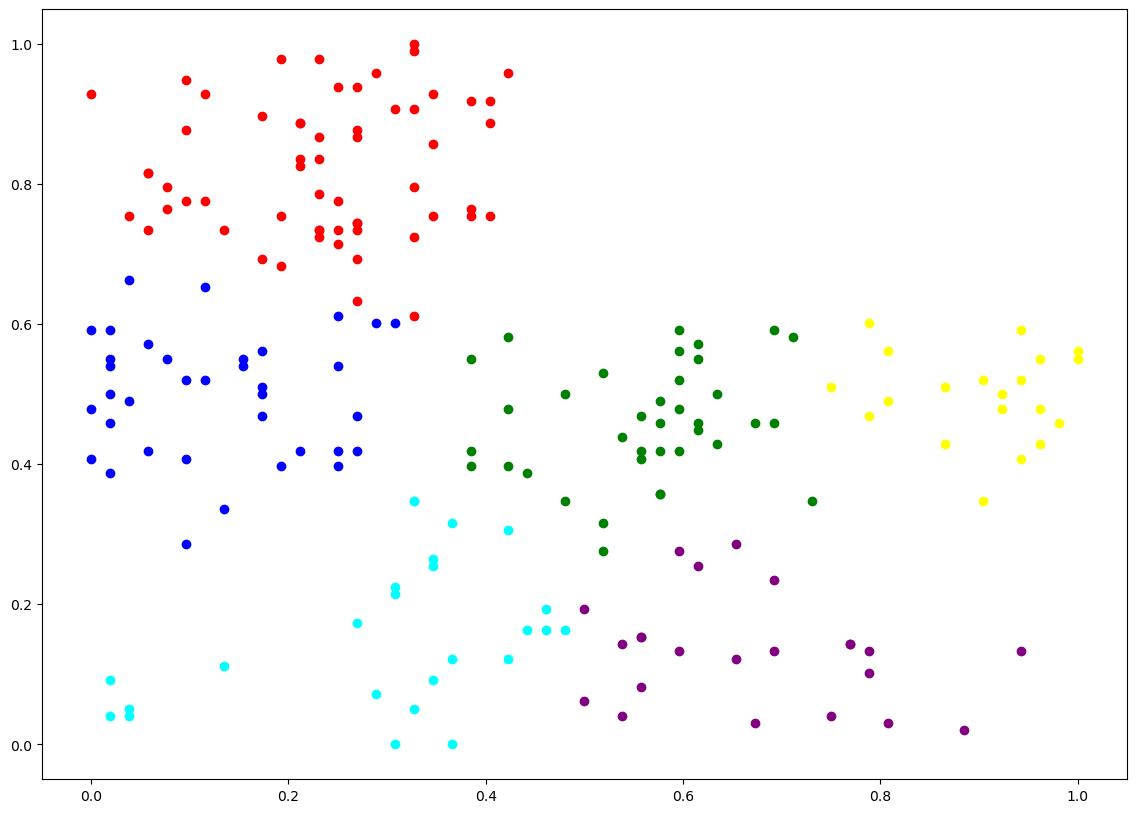

In [32]:
kmeans2 = KMeans(n_clusters=6, init="k-means++", random_state=42)
da["Cluster"] = kmeans2.fit_predict(da)
da_arr = np.array(da)

plt.scatter(da_arr[da_arr[:,2]==0, 0], da_arr[da_arr[:,2]==0, 1], c='red')
plt.scatter(da_arr[da_arr[:,2]==1, 0], da_arr[da_arr[:,2]==1, 1], c='green')
plt.scatter(da_arr[da_arr[:,2]==2, 0], da_arr[da_arr[:,2]==2, 1], c='cyan')
plt.scatter(da_arr[da_arr[:,2]==3, 0], da_arr[da_arr[:,2]==3, 1], c='blue')
plt.scatter(da_arr[da_arr[:,2]==4, 0], da_arr[da_arr[:,2]==4, 1], c='yellow')
plt.scatter(da_arr[da_arr[:,2]==5, 0], da_arr[da_arr[:,2]==5, 1], c='purple')
plt.show()

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


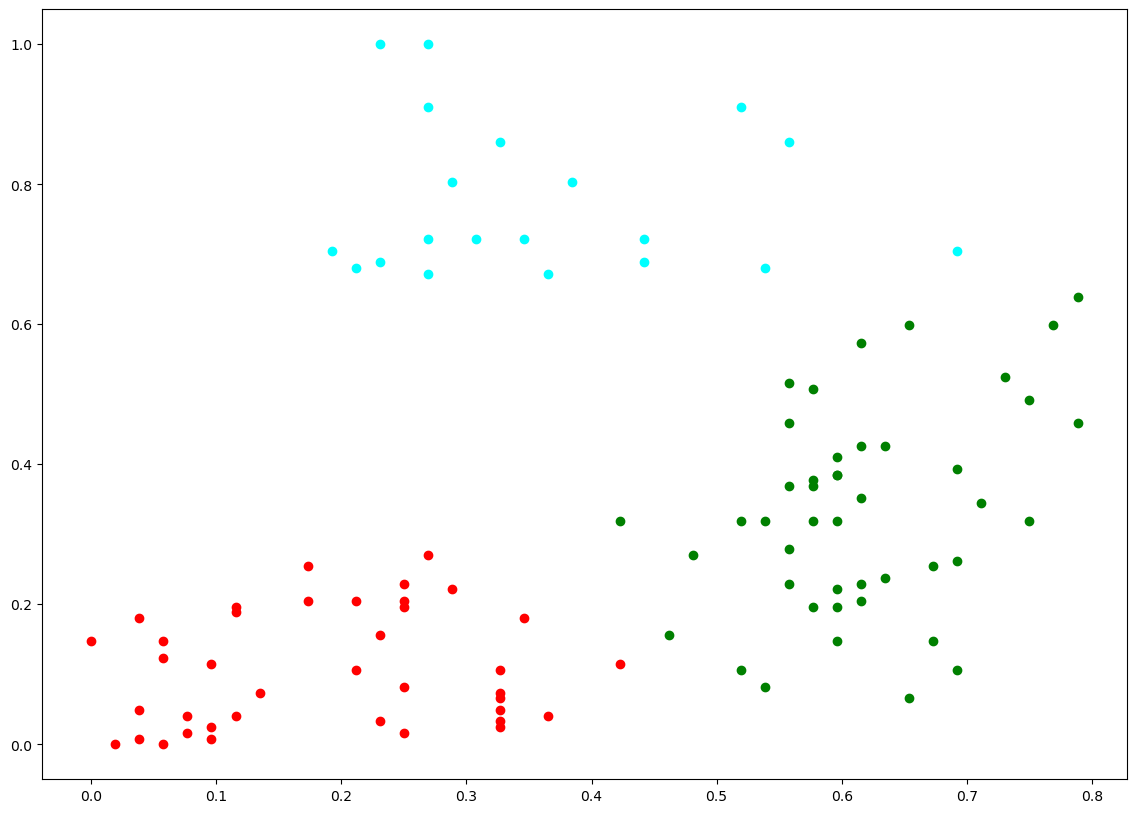

In [33]:
kmeans3 = KMeans(n_clusters=3, init="k-means++", random_state=42)
dat["Cluster"] = kmeans2.fit_predict(dat)
dat_arr = np.array(dat)

plt.scatter(dat_arr[dat_arr[:,2]==0, 0], dat_arr[dat_arr[:,2]==0, 1], c='red')
plt.scatter(dat_arr[dat_arr[:,2]==1, 0], dat_arr[dat_arr[:,2]==1, 1], c='green')
plt.scatter(dat_arr[dat_arr[:,2]==2, 0], dat_arr[dat_arr[:,2]==2, 1], c='cyan')
plt.show()

In [34]:
# Annual income and Spending score is more relevant compared to age of the customers because of which we choose the clustering based on Annual Income and Spending Score.
# Accoring to the graphs, the one with 5 clusters looks far more efficient than others, so we choose the model between annual income and spending score.

In [35]:
kmeans_final = kmeans1
data_final = d
data_final.head()

,Annual Income (k$),Spending Score (1-100),Cluster
0,0.000000,0.387755,2
1,0.000000,0.816327,3
2,0.008197,0.051020,2
3,0.008197,0.775510,3
4,0.016393,0.397959,2


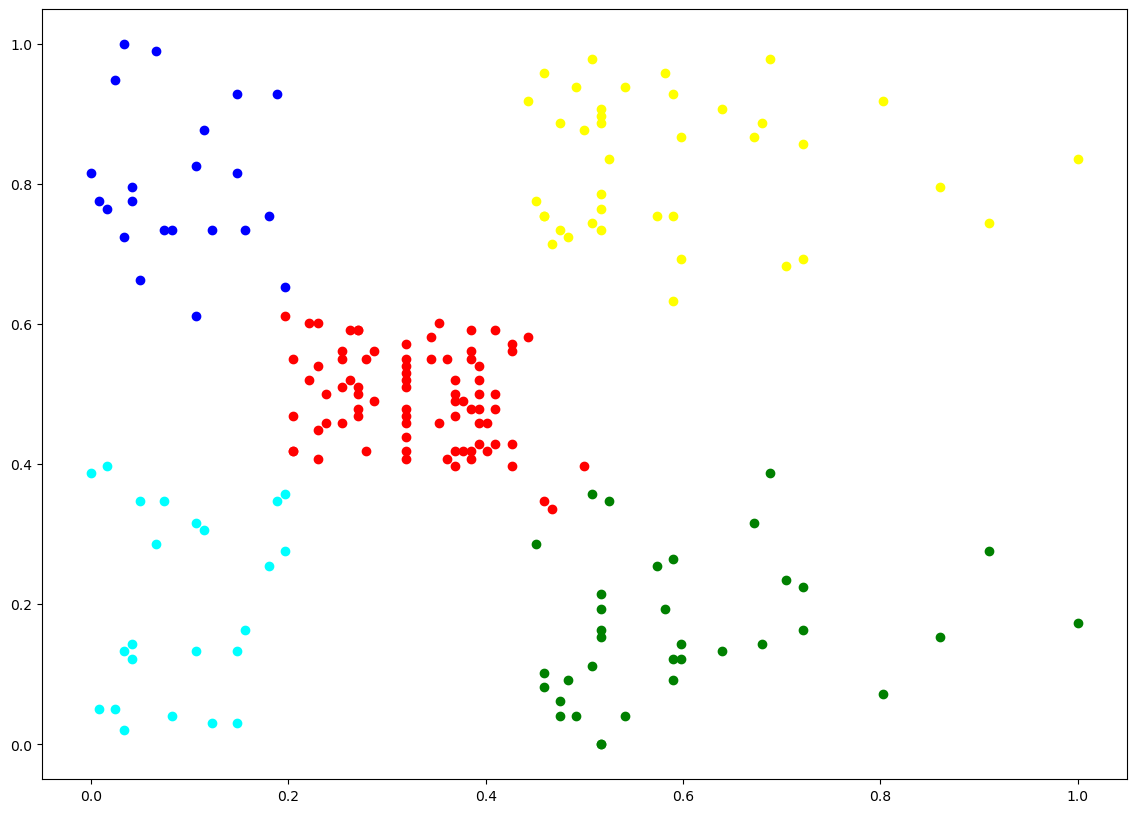

In [36]:
data_final_arr = np.array(data_final)

plt.scatter(data_final_arr[data_final_arr[:,2]==0, 0], data_final_arr[data_final_arr[:,2]==0, 1], c='red')
plt.scatter(data_final_arr[data_final_arr[:,2]==1, 0], data_final_arr[data_final_arr[:,2]==1, 1], c='green')
plt.scatter(data_final_arr[data_final_arr[:,2]==2, 0], data_final_arr[data_final_arr[:,2]==2, 1], c='cyan')
plt.scatter(data_final_arr[data_final_arr[:,2]==3, 0], data_final_arr[data_final_arr[:,2]==3, 1], c='blue')
plt.scatter(data_final_arr[data_final_arr[:,2]==4, 0], data_final_arr[data_final_arr[:,2]==4, 1], c='yellow')
plt.show()